In [1]:
#pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

In [3]:
import pandas as pd

In [4]:
base_dir = r'D:\New folder (3)\New folder\archive (1)\Landscape Classification\Landscape Classification'

train_dir = os.path.join(base_dir, 'Training Data')
test_dir = os.path.join(base_dir, 'Testing Data')
validation_dir = os.path.join(base_dir, 'Validation Data')

In [5]:
train_data = []
test_data = []
validation_data = []

In [6]:
def extract_data(data_dir):
    data_list = []
    
    # List the categories (folder names) in the data directory
    categories = os.listdir(data_dir)
    
    for category in categories:
        category_path = os.path.join(data_dir, category)
        
        # Check if it's a directory (i.e., a category)
        if os.path.isdir(category_path):
            for img_name in os.listdir(category_path):
                img_path = os.path.join(category_path, img_name)
                data_list.append((img_path, category))  # Use the folder name as the label
    
    return data_list

In [7]:
# extracting training data
train_data = extract_data(train_dir)

In [8]:
# Extract testing data
test_data = extract_data(test_dir)

In [9]:
# Extract validation data
validation_data = extract_data(test_dir)

In [10]:
# Convert to DataFrame
train_df = pd.DataFrame(train_data, columns=['image_path', 'label'])
test_df = pd.DataFrame(test_data, columns=['image_path', 'label'])
validation_df = pd.DataFrame(validation_data, columns=['image_path', 'label'])

# Save DataFrames to CSV
train_df.to_csv('training_data.csv', index=False)
test_df.to_csv('testing_data.csv', index=False)
validation_df.to_csv('validation_data.csv' , index = False)


In [11]:
train_df = pd.read_csv('training_data.csv')
test_df = pd.read_csv('testing_data.csv')
validation_df = pd.read_csv('validation_data.csv')

In [12]:
print(train_df.head())
print(test_df.head())
print(validation_df.head())

                                          image_path  label
0  D:\New folder (3)\New folder\archive (1)\Lands...  Coast
1  D:\New folder (3)\New folder\archive (1)\Lands...  Coast
2  D:\New folder (3)\New folder\archive (1)\Lands...  Coast
3  D:\New folder (3)\New folder\archive (1)\Lands...  Coast
4  D:\New folder (3)\New folder\archive (1)\Lands...  Coast
                                          image_path  label
0  D:\New folder (3)\New folder\archive (1)\Lands...  Coast
1  D:\New folder (3)\New folder\archive (1)\Lands...  Coast
2  D:\New folder (3)\New folder\archive (1)\Lands...  Coast
3  D:\New folder (3)\New folder\archive (1)\Lands...  Coast
4  D:\New folder (3)\New folder\archive (1)\Lands...  Coast
                                          image_path  label
0  D:\New folder (3)\New folder\archive (1)\Lands...  Coast
1  D:\New folder (3)\New folder\archive (1)\Lands...  Coast
2  D:\New folder (3)\New folder\archive (1)\Lands...  Coast
3  D:\New folder (3)\New folder\archive 

In [13]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

Forest


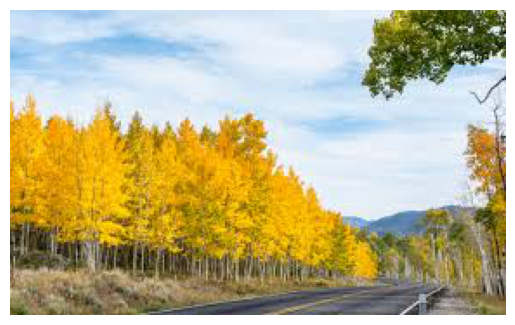

In [14]:
image_path = train_df['image_path'].iloc[5491]

# Open and display the image using PIL
# image = Image.open(image_path)
# image.show()

# Alternatively, use matplotlib to display the image
print(train_df.label.iloc[5491])
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes for a cleaner look
plt.show()

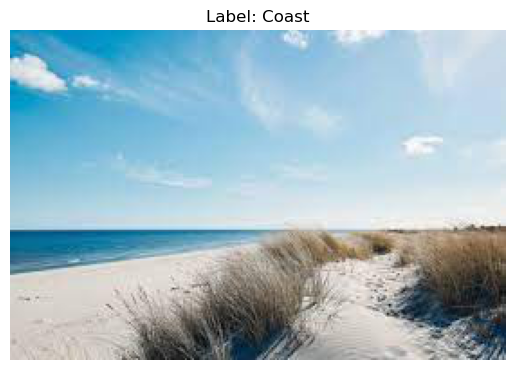

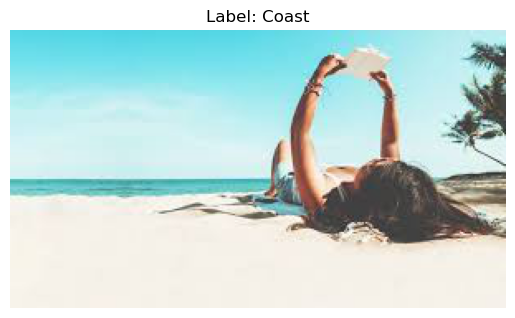

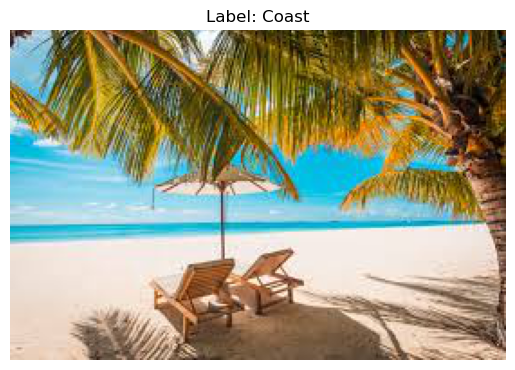

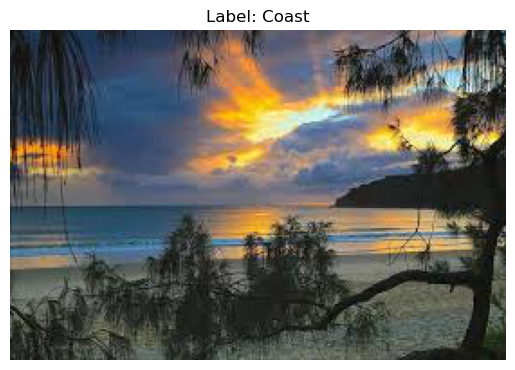

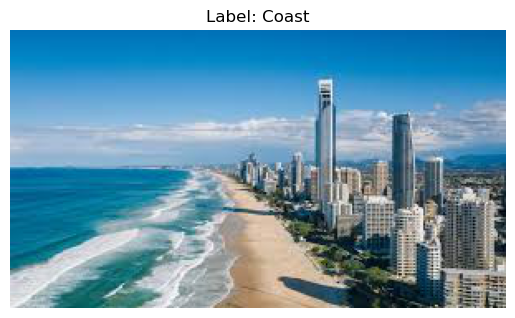

In [15]:
# Display the first 5 images from the training set
for i in range(5):
    image_path = train_df['image_path'].iloc[i]
    img = Image.open(image_path)
    
    # Display using matplotlib
    plt.figure()
    plt.imshow(img)
    plt.title(f"Label: {train_df['label'].iloc[i]}")
    plt.axis('off')
    plt.show()


In [16]:
image_path = test_df['image_path'].iloc[0]

# Open the image
image = Image.open(image_path)

# Get image dimensions
width, height = image.size

# Print the dimensions
print(f"Image Dimensions: Width = {width}, Height = {height}")

Image Dimensions: Width = 262, Height = 192


In [17]:
image = Image.open(image_path)
resized_image = image.resize((224, 224))

In [18]:
# pip install opencv-python

In [19]:
#!pip install tensorflow-gpu

In [20]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [21]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [22]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu , True)

In [23]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [24]:
train_dir = r'D:\New folder (3)\New folder\archive (1)\Landscape Classification\Landscape Classification\Training Data'

# data pipeline
# Create a TensorFlow dataset from the directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),  # Resize images to 224x224
    batch_size=10,  # Number of images to return in each batch
    label_mode='categorical'  # Use 'categorical' for one-hot encoded labels, 'int' for integer labels
)

Found 10000 files belonging to 5 classes.


In [25]:
test_dir = r'D:\New folder (3)\New folder\archive (1)\Landscape Classification\Landscape Classification\Testing Data'

# Create a TensorFlow dataset from the directory
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),  # Resize images to 224x224
    batch_size=10,  # Number of images to return in each batch
    label_mode='categorical'  # Use 'categorical' for one-hot encoded labels, 'int' for integer labels
)

Found 500 files belonging to 5 classes.


In [26]:
validation_dir = r'D:\New folder (3)\New folder\archive (1)\Landscape Classification\Landscape Classification\Validation Data'

# Create a TensorFlow dataset from the directory
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(224, 224),  # Resize images to 224x224
    batch_size=10,  # Number of images to return in each batch
    label_mode='categorical'  # Use 'categorical' for one-hot encoded labels, 'int' for integer labels
)

Found 1500 files belonging to 5 classes.


In [27]:
images_iterator = train_dataset.as_numpy_iterator()

In [28]:
images_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000023FFCC671D0>)

In [29]:
batch = images_iterator.next()

In [30]:
len(batch)

2

In [31]:
#images represented as numpy array
batch[0].shape

(10, 224, 224, 3)

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


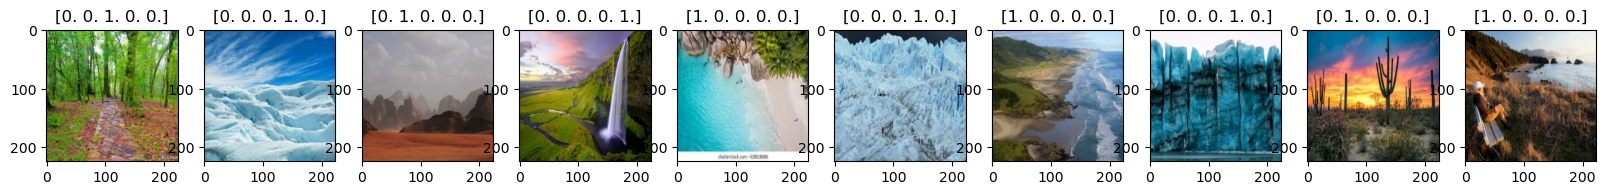

In [32]:
import numpy as np

# Assuming you have a list of class names in the order corresponding to the one-hot encoding
class_names = ['coasts', 'deserts', 'forests', 'glacier', 'mountains']

# Example usage in your code
fig , ax = plt.subplots(ncols = 10 , figsize = (20 , 20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    # Convert the one-hot encoded label to the class name
    class_idx = np.argmax(batch[1][idx])  # Get the index of the '1'
    #class_name = class_names[class_idx]  # Map to the class name
    #ax[idx].title.set_text(class_name)

### Data PreProcessing

In [33]:
import tensorflow as tf
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(224, 224),
    layers.Rescaling(1./255)  
])

# Define the data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
])

AUTOTUNE = tf.data.AUTOTUNE
batch_size = 10

def prepare(ds, shuffle=False, augment=False):
    # Resize and rescale all datasets
    ds = ds.map(lambda x, y: (resize_and_rescale(x), y), num_parallel_calls=AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(1000)

    # Use data augmentation only on the training set
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)

    # Batch all datasets
    ds = ds.batch(batch_size, drop_remainder=True)

    # Use buffered prefetching on all datasets
    return ds.prefetch(buffer_size=AUTOTUNE)



In [34]:
training_ds = prepare(train_dataset, shuffle=True, augment=True)
validation_ds = prepare(validation_dataset)
testing_ds = prepare(test_dataset)

In [35]:
for images, labels in testing_ds.take(1):
    print(f"Processed image batch shape: {images.shape}")

Processed image batch shape: (10, 10, 224, 224, 3)


In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [37]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,  # Do not include the top layer (classification head)
    weights='imagenet',  # Load weights pre-trained on ImageNet
    input_shape=(224, 224, 3)  # Specify input shape
)

In [38]:
# Step 2: Freeze the Base Model
base_model.trainable = False


In [39]:
# def train_step(images, labels):
#     with tf.GradientTape() as tape:
#         predictions = model(images, training=True)
#         loss = tf.keras.losses.categorical_crossentropy(labels, predictions)
#     gradients = tape.gradient(loss, model.trainable_variables)
#     optimizer.apply_gradients(zip(gradients, model.trainable_variables))
#     return loss

In [40]:
# # Compile and train the model as usual
# optimizer = tf.keras.optimizers.Adam()

In [41]:
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [42]:
# training = model.fit(train_dataset,  # Your training dataset
#                     validation_data=validation_dataset,  # Your validation dataset
#                     epochs=10)  # Number of epochs

In [43]:
# model.summary()

In [44]:
# from sklearn.model_selection import KFold
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import layers, models
# from sklearn.metrics import confusion_matrix
# import tensorflow as tf

# # Image data generators
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2  # Assuming 20% validation split
# )

# # Set batch size and image dimensions
# batch_size = 32
# image_size = (224, 224)

# # Directory for training data
# data_dir = r'D:\New folder (3)\New folder\archive (1)\Landscape Classification\Landscape Classification\Training Data'

# # K-fold cross-validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Assuming the number of samples is fixed (9000 for this example)
# num_samples = 9000

# # Create an array of indices to use for KFold splitting
# indices = np.arange(num_samples)

# fold_no = 1
# for train_index, test_index in kf.split(indices):
#     print(f'Processing fold {fold_no}...')

#     # Create train and validation generators for the current fold
#     train_generator = datagen.flow_from_directory(
#         data_dir,
#         target_size=image_size,
#         batch_size=batch_size,
#         class_mode='categorical',
#         subset='training',
#         shuffle=True
#     )

#     validation_generator = datagen.flow_from_directory(
#         data_dir,
#         target_size=image_size,
#         batch_size=batch_size,
#         class_mode='categorical',
#         subset='validation',
#         shuffle=False
#     )

#     # Create the model (simple CNN as an example)
#     model = models.Sequential([
#         layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#         layers.MaxPooling2D(2, 2),
#         layers.Conv2D(64, (3, 3), activation='relu'),
#         layers.MaxPooling2D(2, 2),
#         layers.Conv2D(128, (3, 3), activation='relu'),
#         layers.MaxPooling2D(2, 2),
#         layers.Flatten(),
#         layers.Dense(512, activation='relu'),
#         layers.Dense(5, activation='softmax')  # Assuming 5 classes
#     ])

#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#     # Train the model
#     history = model.fit(
#         train_generator,
#         validation_data=validation_generator,
#         epochs=10
#     )

#     # Predictions and confusion matrix
#     Y_pred = model.predict(validation_generator)
#     y_pred = np.argmax(Y_pred, axis=1)

#     # Get the true labels
#     y_true = validation_generator.classes

#     # Compute the confusion matrix
#     cm = confusion_matrix(y_true, y_pred)
#     print(f'Confusion Matrix for fold {fold_no}:\n', cm)

#     fold_no += 1

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [47]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [48]:
for layer in base_model.layers:
    layer.trainable = False

In [49]:
model = models.Sequential([
    base_model,                              # Pre-trained ResNet50 model
    layers.GlobalAveragePooling2D(),         # Global pooling layer to reduce feature dimensions
    layers.Dense(128, activation='relu'),    # Custom fully connected layer
    layers.Dropout(0.5),                     # Dropout to reduce overfitting
    layers.Dense(5, activation='softmax')  # Final classification layer with softmax
])

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,629 (90.98 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [51]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
history = model.fit(train_dataset, 
                    validation_data=validation_dataset, 
                    epochs=10)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 213s 209ms/step - accuracy: 0.6746 - loss: 0.9127 - val_accuracy: 0.7680 - val_loss: 0.6335
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 200s 200ms/step - accuracy: 0.8049 - loss: 0.5490 - val_accuracy: 0.7973 - val_loss: 0.5684
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 199s 199ms/step - accuracy: 0.8195 - loss: 0.4996 - val_accuracy: 0.7747 - val_loss: 0.6083
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 200s 200ms/step - accuracy: 0.8319 - loss: 0.4551 - val_accuracy: 0.7780 - val_loss: 0.6288
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 200s 200ms/step - accuracy: 0.8457 - loss: 0.4216 - val_accuracy: 0.8020 - val_loss: 0.5728
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 200s 200ms/step - accuracy: 0.8553 - loss: 0.4014 - val_accuracy: 0.7880 - val_loss: 0.6261
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 200s 200ms/step - accuracy: 0.8690 - loss: 0.3669 - val_accuracy: 0.7953 - val_loss: 0.6062
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 211s 211ms/step - ac

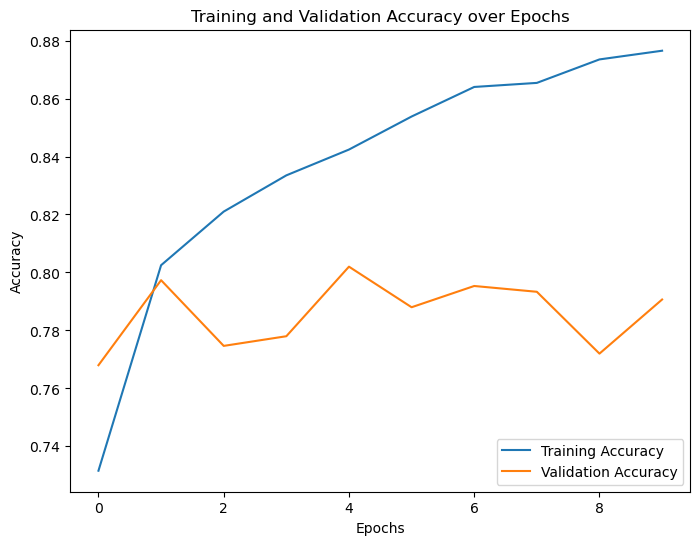

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


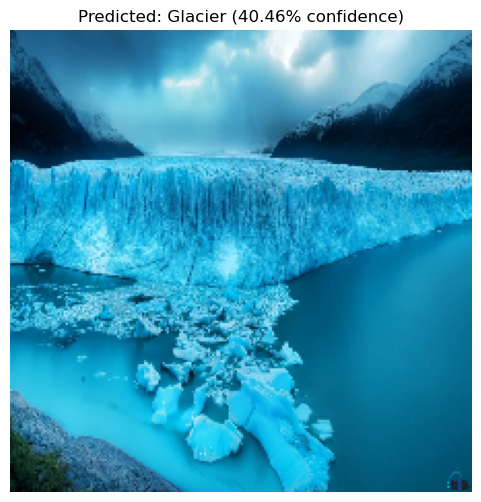

This image most likely belongs to Glacier with a 40.46 percent confidence.


In [62]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading the image
img_path = r'C:\Users\athar\Downloads\WhatsApp Image 2024-10-21 at 11.51.28_760f3cc6.jpg'
img_height = 224
img_width = 224
img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)
class_names = test_dataset.class_names
# Converting the image to an array and add a batch dimension
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Making predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Getting the predicted class
predicted_class = class_names[np.argmax(score)]
predicted_confidence = 100 * np.max(score)

# Displaying the image with the actual and predicted output
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Predicted: {predicted_class} ({predicted_confidence:.2f}% confidence)")
plt.axis('off')
plt.show()

# Printing the result
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(predicted_class, predicted_confidence)
)


# Confusion Matrix
# # cm = confusion_matrix(test_generator.classes, y_pred)

# # Class labels for confusion matrix display
# class_labels = list(test_generator.class_indices.keys())

# # Plotting Confusion Matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

 211/1000 ━━━━━━━━━━━━━━━━━━━━ 4:27 339ms/step - accuracy: 0.8869 - loss: 0.3018

In [59]:
# Save the model
model.save('landscapes11.h5')

# Load the model
# loaded_model = tf.keras.models.load_model('landscapes.h5')

In [ ]:
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']

loss = training.history['loss']
val_loss = training.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [100]:
desert_path = r'C:\Users\athar\Downloads\WhatsApp Image 2024-09-11 at 21.59.46_26391de5.jpg'
#desert_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img_height = 224
img_width = 224
img = tf.keras.utils.load_img(
    desert_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This image most likely belongs to Mountain with a 27.18 percent confidence.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


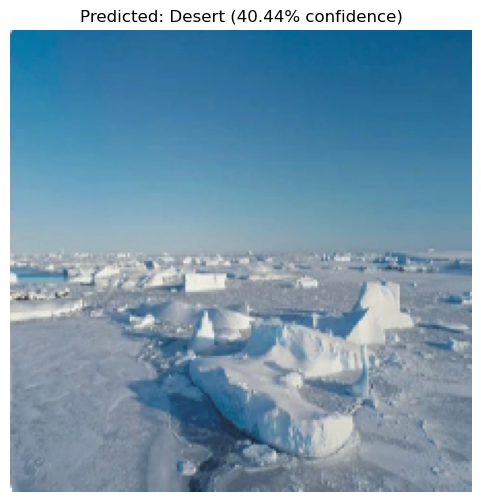

This image most likely belongs to Desert with a 40.44 percent confidence.


In [99]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = r'C:\Users\athar\Downloads\WhatsApp Image 2024-09-11 at 22.17.17_13dcdebc.jpg' # Path to your image
img_height = 224
img_width = 224

# Load the image with the target size
img = image.load_img(img_path, target_size=(img_height, img_width))

# Convert the image to an array and add a batch dimension
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Create a batch

# Normalize the image
img_array = img_array / 255.0

# Make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Get class names from the dataset
class_names = test_dataset.class_names  # Ensure this matches how you load class names

# Get the predicted class and confidence
predicted_class = class_names[np.argmax(score)]
predicted_confidence = 100 * np.max(score)

# Display the image with the prediction result
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Predicted: {predicted_class} ({predicted_confidence:.2f}% confidence)")
plt.axis('off')
plt.show()

# Print the prediction result
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(predicted_class, predicted_confidence)
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


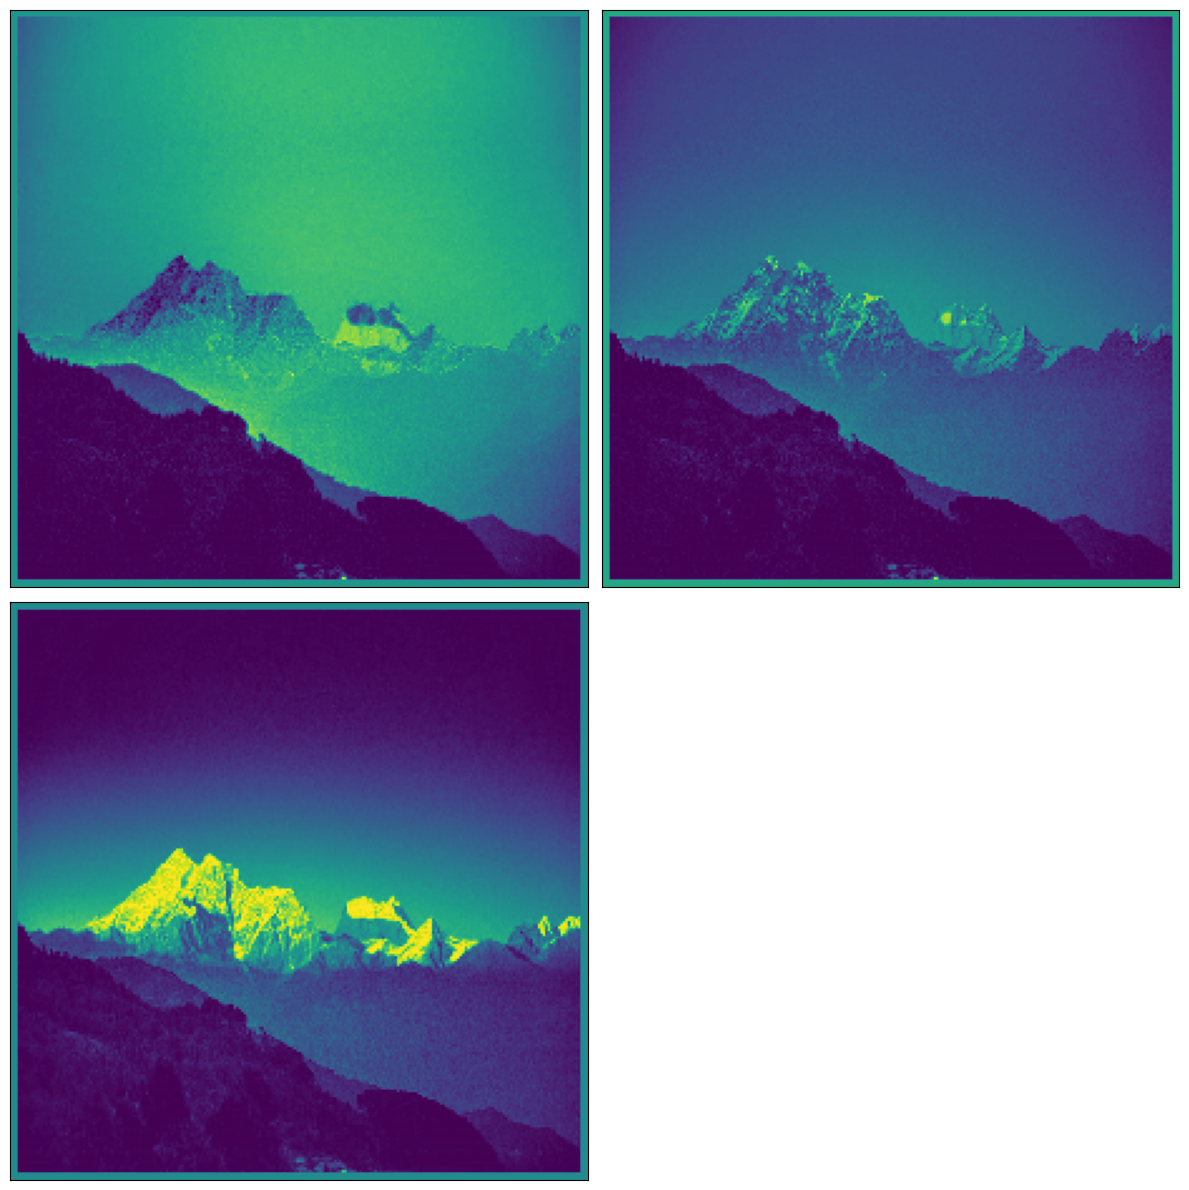

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import math

# Load the pre-trained ResNet50 model (excluding top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Choose layers to visualize
layer_outputs = [layer.output for layer in base_model.layers if 'conv' in layer.name]  # Get convolutional layers
feature_map_model = Model(inputs=base_model.input, outputs=layer_outputs)  # Create a new model that outputs feature maps

# Load and preprocess the image (replace with your own image loading method)
image_path = r'C:\Users\athar\Downloads\WhatsApp Image 2024-10-03 at 22.02.28_5856b85a.jpg'  # Replace with an actual path to the image you want to visualize
img = load_img(image_path, target_size=(224, 224))  # Load the image and resize to 224x224 (required by ResNet50)
img_array = img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Preprocess image as required by ResNet50 (scaling)

# Get feature maps for the image from all selected layers
feature_maps = feature_map_model.predict(img_array)

# Visualize the feature maps from a specific layer (e.g., the first convolutional block in ResNet50)
layer_index = 0  # Change this to visualize feature maps from other layers
feature_map = feature_maps[layer_index]  # Feature maps from the chosen layer

# Limit the number of feature maps to display (e.g., first 64 maps)
num_feature_maps = min(feature_map.shape[-1], 64)  # Limit to 64 feature maps max
size = feature_map.shape[1]  # Height/Width of the feature map

# Automatically calculate the grid size (e.g., 8x8 if showing 64 maps)
grid_size = math.ceil(math.sqrt(num_feature_maps))

# Set figure size dynamically based on grid size
fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(12, 12))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i in range(num_feature_maps):
    # Plot each feature map
    ax = axes[i]
    ax.imshow(feature_map[0, :, :, i], cmap='viridis')
    ax.set_xticks([])  # Remove x-ticks
    ax.set_yticks([])  # Remove y-ticks

# Remove unused axes in case there are fewer feature maps than grid size
for i in range(num_feature_maps, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


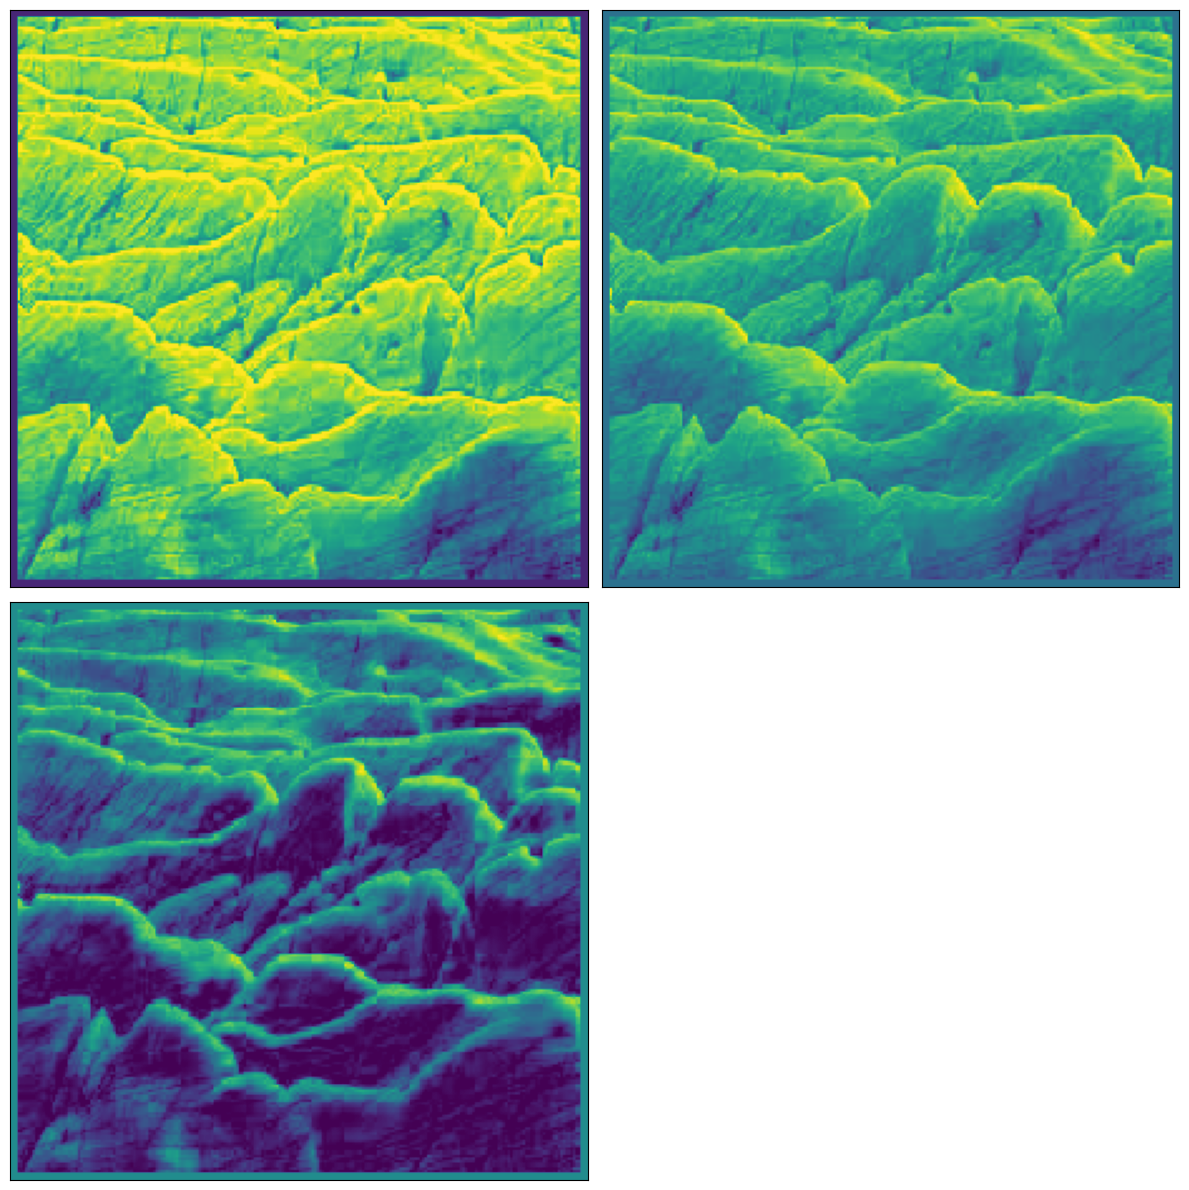

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import math

# Load the pre-trained ResNet50 model (excluding top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Choose layers to visualize
layer_outputs = [layer.output for layer in base_model.layers if 'conv' in layer.name]  # Get convolutional layers
feature_map_model = Model(inputs=base_model.input, outputs=layer_outputs)  # Create a new model that outputs feature maps

# Load and preprocess the image (replace with your own image loading method)
image_path = r'D:\New folder (3)\New folder\archive (1)\Landscape Classification\Landscape Classification\Testing Data\Glacier\Glacier (339).jpeg'  # Replace with an actual path to the image you want to visualize
img = load_img(image_path, target_size=(224, 224))  # Load the image and resize to 224x224 (required by ResNet50)
img_array = img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Preprocess image as required by ResNet50 (scaling)

# Get feature maps for the image from all selected layers
feature_maps = feature_map_model.predict(img_array)

# Visualize the feature maps from a specific layer (e.g., the first convolutional block in ResNet50)
layer_index = 0  # Change this to visualize feature maps from other layers
feature_map = feature_maps[layer_index]  # Feature maps from the chosen layer

# Limit the number of feature maps to display (e.g., first 64 maps)
num_feature_maps = min(feature_map.shape[-1], 64)  # Limit to 64 feature maps max
size = feature_map.shape[1]  # Height/Width of the feature map

# Automatically calculate the grid size (e.g., 8x8 if showing 64 maps)
grid_size = math.ceil(math.sqrt(num_feature_maps))

# Set figure size dynamically based on grid size
fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(12, 12))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i in range(num_feature_maps):
    # Plot each feature map
    ax = axes[i]
    ax.imshow(feature_map[0, :, :, i], cmap='viridis')
    ax.set_xticks([])  # Remove x-ticks
    ax.set_yticks([])  # Remove y-ticks

# Remove unused axes in case there are fewer feature maps than grid size
for i in range(num_feature_maps, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [60]:
# Save the trained model
model.save('landscape_classifier.h5')

In [61]:
from tensorflow.keras.models import load_model


model = load_model('landscape_classifier.h5')